# Diabetic Retinopathy Predictor

 # Documentation

## Proposal


● Problem statement formation

To develop a model that will classify the severity of diabetic retinopathy based on eye images with at least 80% accuracy.

● Context

Diabetic retinopathy can lead to complications like loss of vision and even blindness. It would be useful to have an additional tool to identify this disease and to what stage it has progressed to be able to determine treatment and perhaps even reversal, when caught early enough.

● Criteria for success

To produce a model that consistently get a prediction rate of at least 80%. The deliverables will be a GitHub repo containing the work for each step of the project, including a slide deck and a project report.

● Scope of solution space

There will an exploration of various machine learning classification models that work well on images, including extensive hyperparameter tuning in attempt to find a high performing model.

● Constraints

Altogether, there are about 90,000 labeled images available to work with. It is not known yet what kind of processing resources are going to be available. If processing takes too long with that size dataset on a laptop, finding a cloud resource and/or reduction of size and/or number of images may be necessary.

● Stakeholders

Doctors and patients interested in the diagnosis of diabetic retinopathy.

● Data sources

This dataset contains images from the 2015 Diabetic Retinopathy Detection and APTOS 2019 Blindness Detection competitions. Each image has been resized and cropped to have a maximum size of 1024px.

For the 2015 images, a left and right field is provided for every subject. Images are labeled with a subject id as well as either left or right (e.g. 1_left.jpeg is the left eye of patient id 1). The 2019 images do not specify a subject or eye.

A clinician has rated each image for the severity of diabetic retinopathy on a scale of 0 to 4:
0 – No DR,
1-Mild,
2-Moderate,
3-Severe,
4-Proliferative DR.

The images were gathered from multiple clinics using a variety of cameras over an extended period of time and are of varying quality.

Data Link:
https://www.kaggle.com/benjaminwarner/resized-2015-2019-blindness-detection-images

## Experiments

###General Experimentation Information: Models


>The datasets were from kaggle and consisted of four directories worth of images
>>training and testing image data from each of 2015 and 2019
>All the data had labels indicated in a separate .csv file except for the testing data from 2019

>Note - although the term test1, test5, etc. used - the datasets with those terms were actually training data (split into training and validation) used for the training.  Note that fastai calls the data held out from the training as "validation" data, thus in the code the reference to "valid_ds" is this split out data.  (With other machine learning tools, this split out data is referred to as "test data").

>All the models were trained with a 80/20 training/validation split

>Although not all the tests are shown in this notebook or even numbered, there were at least thirty different models run

>The models differed based on

>>Datasets of various sizes and configurations with a sampling of 2015 data, 2019 data or a combination

>>Images sizes (1024 to match size of images vs 128 to allow processing to experimenting with 256 until eventually setting on 224 when discovering that that size matched with the images resnet pretrained on 

>>Using resnet34 vs resnet50 vs resnet152

>>Using batch sizes of 16 or 32 or 64

>>Using classification of all 5 levels, trinary in two different ways, and binary

>>Running on different numbers of epochs (5,7,8,10,15) with and without refining epochs run with learning rate based on the learn rate finder

>The basic progression of testing went as follows:

>>Small subsets of 2015 data, trying to be able to work to complete on Colab platform, using 1024 image size, models preforming very badly

>>Trying smaller image sizes, settling on 128, trying various data distributions

>>Getting more success when reducing number of 0 level diagnosis and upping level 4 diagnosis levels as much as possible (which could be done because they were proportionally lower)

>>Models finally start to reach past 80% accuracy on test7 using all the level 4s possible within the 2015 dataset, and using about the same number of 3s, along with lower numbers of 1s and 2s and a number of 0s that were about the same as all the 1s, 2s, 3s and 4s put together.

>>Model was tried with trinary classification and got less accuracy, but improved into high 80 accuracy with binary classification.

>>Started to use 2019 data along with the 2015 data and got mid-80s accuracy.  

>>Then noticed 2019 data by itself had similar proportions of diagnosis levels as did well in models and also was on the order of the total amount of data being used in other models that did well, so developed model on all of 2019 training data.  That model (from test 13) got accuracy and recall in the high 90s.

>>The excitement about that did not last as tried that 2019-based model on 2015 test data (only those that had a level of 1 or more) and it did horribly.  However, among those horrible numbers, the level 4 noticably did best.

>>Thus, the test 11 model was brought back in to try as it had been trained on 2015 and 2019 data. It was also run on non-zero level 2019 test data.  The level 1 and level 2 recall percentages were not good.  However the level 3 and level 4 recall percentages were 90% and 97%, respectively.  There was some further, unfruitful experimentation.  Thus, for all the models explored, this was chosen as the best model.




###General Experimentation Information: Code


General information about the code presented in text form (eg section "Test 7 Code (in text form)": 

> The code above accesses data on a private google drive, but you can attain the data via the link above in the Data Sources subsection of the Proposal Section

> Before you can run putting the code in code cells and running it, you need to run the code "Common Setup Code" section

> The code in all the "(in text form)" sections are available to cut and paste into code cells, if desired, but the models will be provided in the models section of the github depository and thus can be loaded, although you will have run enough code to reproduce the model variable (as is done toward the end of the notebook to reproduce the learn11 model).

> The github repository that contains this notebook has a models directory that contains all the models but the code will need to be adjusted to point to where the model is located or the model file will need to be moved to the default place where the load function finds it - that is, the directory where the images used to train the model are located.

###Code In Text Form

This is provided to cut and paste if desired - all the models will be available in the models directory in the Github repository.

Note: Used comment symbols based on triple apostrophes (''') because number sign indicates a markdown header (and while there is a way to conteract this in the colab notebook - it does not seem to work when downloading the notebook, putting it in github and then accessing the html link to the notebook).

#### Test 7 Code (in text form)

>>'''

>>Create dataframes with sample information from dataset15 only

>>'''

>test7_dataset15_level_sample_n = [2000, 133, 133, 133, 700]

>test7_df_samples = create_sample_df(labels_path_str, labels15_csv_str, randomState, dataset15_column_renames, test7_dataset15_level_sample_n, trinary_level_conversions)

>print(test7_df_samples['level'].value_counts())

>>'''

>>0    2000

>>4     700

>>3     133

>>1     133

>>2     133

>>'''

>'''Path of folder to move test 7 images identified in test7_df_samples'''

>test7_samples_path_str = base_samples_path_str + '7'

>'''Actual code to copy images - should only be run once'''

>'''copy_samples_to_dir(dataset15_path_str, test7_samples_path_str, test7_df_samples)'''

>test7_data = create_databunch_from_df (test7_samples_path_str, test7_df_samples, smallBatchSize, typicalTransform)

>learn7 = cnn_learner(test7_data, models.resnet50, metrics=accuracy)

>'''Get information to possibly refine model later'''

>learn7.lr_find()

>learn7.recorder.plot()

>learn7.fit_one_cycle(10)

>>'''

>>epoch	train_loss	valid_loss	accuracy	time

>>0	1.055130	0.677387	0.778675	07:36

>>1	0.654117	0.542391	0.781906	01:43

>>2	0.579783	0.398465	0.841680	01:42

>>3	0.486843	0.373473	0.851373	01:42

>>4	0.499193	0.349844	0.880452	01:43

>>5	0.453020	0.341858	0.870759	01:43

>>6	0.415184	0.314954	0.888530	01:43

>>7	0.374301	0.320926	0.888530	01:43

>>8	0.367336	0.316909	0.891761	01:43

>>9	0.334733	0.313957	0.891761	01:42

>>'''

>learn7.save('eye-images-7-c')

>interp7 = ClassificationInterpretation.from_learner(learn7)

>interp7.plot_confusion_matrix(figsize=(9,9), dpi=60)

>learn7.unfreeze()

>learn7.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

>>'''

>>epoch	train_loss	valid_loss	accuracy	time

>>0	0.340591	0.319546	0.878837	01:43

>>1	0.337809	0.304703	0.898223	01:43

>>2	0.299309	0.297511	0.896607	01:46

>>'''

>learn7.save('eye-images-7-c2')

>interp7 = ClassificationInterpretation.from_learner(learn7)

>interp7.plot_confusion_matrix(figsize=(9,9), dpi=60)

>learn7.load('eye-images-7c')

>learn7.unfreeze()

>learn7.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

>learn7.save('eye-images-7-c3')

>>'''

>>epoch	train_loss	valid_loss	accuracy	time

>>0	0.326171	0.312629	0.882068	01:43

>>1	0.324805	0.302370	0.898223	01:43

>>'''

#### Test 10 Code (in text form)



>'''Create dataframes with sample information from each of dataset15 and dataset19'''


>test10_dataset15_level_sample_n = [2000, 300, 300, 700, 700]

>test10_dataset19_level_sample_n = [540, 80, 80, 190, 190]

>test10_dataset15_df_samples = create_sample_df(labels_path_str, labels15_csv_str, randomState, dataset15_column_renames, test10_dataset15_level_sample_n, binary_level_conversions)

>test10_dataset19_df_samples = create_sample_df(labels_path_str, labels19_csv_str, randomState, dataset19_column_renames, test10_dataset19_level_sample_n, binary_level_conversions)

>print(test10_dataset15_df_samples['level'].value_counts())

>>'''

>>4    2000

>>0    2000

>>'''

>print(test10_dataset19_df_samples['level'].value_counts())

>> '''

>>4    540

>>0    540

>>'''

>'''Make on dataframe with a combination of both dataset samples'''


>test10_df_samples = test10_dataset15_df_samples.append(test10_dataset19_df_samples)

>print(test10_df_samples['level'].value_counts())

>>'''

>>4    2540

>>0    2540

>>'''

>'''Path of folder to move test 10 images identified in test10_df_samples'''


>test10_samples_path_str = base_samples_path_str + '10'

>'''Actual code to copy images - should only be run once'''

>'''copy_samples_to_dir(dataset15_path_str, test10_samples_path_str, test10_dataset15_df_samples)'''

>'''copy_samples_to_dir(dataset19_path_str, test10_samples_path_str, test10_dataset19_df_samples)'''

>test10_data = create_databunch_from_df (test10_samples_path_str, test10_df_samples, smallBatchSize, typicalTransform)

>learn10 = cnn_learner(test10_data, models.resnet50, metrics=[accuracy, Recall()])

>'''Get information to possibly refine model later'''

>learn10.lr_find()

>learn10.recorder.plot()

>learn10.fit_one_cycle(10)

>>'''

>>epoch	train_loss	valid_loss	accuracy	recall	time

>>0	0.852642	0.752703	0.767717	0.648594	02:46

>>1	0.598108	0.554188	0.752953	0.694779	02:46

>>2	0.558326	0.466926	0.776575	0.765060	02:46

>>3	0.496111	0.430008	0.797244	0.813253	02:47

>>4	0.417499	0.405695	0.828740	0.771084	02:47

>>5	0.402088	0.384000	0.839567	0.775100	02:47

>>6	0.395909	0.370797	0.841535	0.803213	02:48

>>7	0.360989	0.367349	0.847441	0.777108	02:47

>>8	0.345805	0.359094	0.848425	0.767068	02:47

>>9	0.342134	0.356558	0.847441	0.773092	02:46

>>'''

>learn10.save('eye-images-10')

>interp10 = ClassificationInterpretation.from_learner(learn10)

>interp10.plot_confusion_matrix(figsize=(9,9), dpi=60)

>learn10.unfreeze()

>learn10.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

>>'''

>>epoch	train_loss	valid_loss	accuracy	recall	time

>>0	0.340026	0.364875	0.843504	0.748996	02:49

>>1	0.320051	0.351151	0.856299	0.793173	02:49

>>2	0.318844	0.363702	0.850394	0.767068	02:51

>>'''

>learn10.save('eye-images-10-2')

>interp10 = ClassificationInterpretation.from_learner(learn10)

>interp10.plot_confusion_matrix(figsize=(9,9), dpi=60)

>learn10.load('eye-images-10')

>learn10.unfreeze()

>learn10.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

>>''' results not available but model 'eye-images-10-3' could be rerun '''

>learn10.save('eye-images-10-3')



####Test 11 Code

>Note - model saved as "eye-images-11-3" was eventually used as the final model

>>'''Create dataframes with sample information from each of dataset15 and dataset19'''


>test11_dataset15_level_sample_n = [1500, 300, 300, 700, 700]

>test11_dataset19_level_sample_n = [340, 80, 80, 190, 190]

>test11_dataset15_df_samples = create_sample_df(labels_path_str, labels15_csv_str, randomState, dataset15_column_renames, test11_dataset15_level_sample_n, binary_level_conversions)

>test11_dataset19_df_samples = create_sample_df(labels_path_str, labels19_csv_str, randomState, dataset19_column_renames, test11_dataset19_level_sample_n, binary_level_conversions)

>print(test11_dataset15_df_samples['level'].value_counts())

>>'''

>>4    2000

>>0    1500

>>'''

>print(test11_dataset19_df_samples['level'].value_counts())

>>4    540

>>0    340

'''

>print(test11_dataset15_df_samples['level'].value_counts())

>>'''

>>4    2000

>>0    1500

>>'''

>print(test11_dataset19_df_samples['level'].value_counts())

>>'''

>>4    540

>>0    340

>>'''

>'''Make on dataframe with a combination of both dataset samples'''

>test11_df_samples = test11_dataset15_df_samples.append(test11_dataset19_df_samples)

>print(test11_df_samples['level'].value_counts())

>>'''

>>4    2540

>>0    1840

>>'''

>'''Path of folder to move test 11 images identified in test11_df_samples'''

>test11_samples_path_str = base_samples_path_str + '11'

>'''Actual code to copy images - should only be run once'''

>'''copy_samples_to_dir(dataset15_path_str, test11_samples_path_str, test11_dataset15_df_samples)'''

>'''copy_samples_to_dir(dataset19_path_str, test11_samples_path_str, test11_dataset19_df_samples)'''

>test11_data = create_databunch_from_df (test11_samples_path_str, test11_df_samples, smallBatchSize, typicalTransform)

>learn11 = cnn_learner(test11_data, models.resnet50, metrics=[accuracy, Recall()])

>'''Get information to possibly refine model later'''

>learn11.lr_find()

>learn11.recorder.plot()

>learn11.fit_one_cycle(10)

>>'''

>>epoch	train_loss	valid_loss	accuracy	recall	time

>>0	0.947531	0.742539	0.750000	0.678715	02:47

>>1	0.610180	0.505015	0.771689	0.714859	02:48

>>2	0.537894	0.457044	0.767123	0.817269	02:48

>>3	0.541207	0.425813	0.805936	0.748996	02:48

>>4	0.472977	0.388881	0.809361	0.736948	02:49

>>5	0.426474	0.386254	0.821918	0.757028	02:49

>>6	0.401211	0.356076	0.839041	0.785141	02:49

>>7	0.382474	0.350780	0.843607	0.783133	02:49

>>8	0.349627	0.347856	0.843607	0.787149	02:50

>>9	0.360491	0.342028	0.852740	0.795181	02:50

>>'''

>learn11.save('eye-images-11')

>interp11 = ClassificationInterpretation.from_learner(learn11)

>interp11.plot_confusion_matrix(figsize=(9,9), dpi=60)

>learn11.unfreeze()

>learn11.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

>>epoch	train_loss	valid_loss	accuracy	recall	time

>>0	0.332906	0.337174	0.843607	0.805221	02:55

>>1	0.347542	0.327634	0.855023	0.833333	02:55

>>2	0.304024	0.342977	0.848173	0.783133	02:55

>>'''

>learn11.save('eye-images-11-2')

>interp11 = ClassificationInterpretation.from_learner(learn11)

>interp11.plot_confusion_matrix(figsize=(9,9), dpi=60)

>learn11.load('eye-images-11')

>learn11.unfreeze()

>learn11.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

>>'''

>>epoch	train_loss	valid_loss	accuracy	recall	time

>>0	0.349955	0.347697	0.852740	0.783133	02:52

>>1	0.363689	0.330807	0.855023	0.823293	02:51

>>'''

>learn11.save('eye-images-11-3')

####Test 12 Code

>test12_dataset19_df_all = df_dataset19.copy(deep=True)

>df_convert_levels(test12_dataset19_df_all, binary_level_conversions)


>test12_data = create_databunch_from_df (dataset19_path_str, test12_dataset19_df_all)


>>‘’’Lengths of full test12 dataset, test12 training data, test12 testing data’’’

len(test12_dataset19_df_all), len(test12_data.train_ds), len(test12_data.valid_ds)

>>’’’

>>(3662, 2930, 732)

>>’’’

>print(test12_data.classes)

>>’’’

>>[0, 4]

>>’’’

>test12_data.show_batch(rows=3, figsize=(7,6))

>learn12 = cnn_learner(test12_data, models.resnet50, metrics=[accuracy, Recall()])

>’’’Get information to possibly refine model later’’’

>learn12.lr_find()

>learn12.recorder.plot()

>learn12.fit_one_cycle(10)

>>’’’

>>0	0.335215	0.274802	0.949454	0.915531	04:35

>>1	0.269235	0.194612	0.939891	0.893733	01:54

>>2	0.222545	0.186841	0.954918	0.920981	01:54

>>3	0.187717	0.093024	0.972678	0.967302	01:55

>>4	0.129214	0.106553	0.967213	0.953678	01:55

>>5	0.137221	0.070567	0.982240	0.975477	01:54

>>6	0.096174	0.090043	0.969945	0.950954	01:55

>>7	0.085907	0.074272	0.978142	0.978202	01:55

>>8	0.064736	0.073385	0.974044	0.970027	01:55

>>9	0.090616	0.073318	0.975410	0.972752	01:56

>>’’’

>learn12.save('images12-epoch10')

>>’’’

>>epoch	train_loss	valid_loss	accuracy	recall	time

>>0	0.277508	0.251417	0.960383	0.958115	07:24

>>1	0.226898	0.103349	0.968579	0.947644	02:06

>>2	0.169735	0.155011	0.960383	0.942408	02:06

>>3	0.168899	0.103694	0.971311	0.958115	02:07

>>4	0.102200	0.100494	0.974044	0.958115	02:08

>>5	0.084937	0.077078	0.972678	0.955497	02:07

>>6	0.048090	0.051389	0.983607	0.973822	02:07

>>7	0.049503	0.057402	0.979508	0.968586	02:06

>>8	0.036663	0.077328	0.980874	0.968586	02:05

>>9	0.021156	0.083538	0.980874	0.968586	02:04

>>’’’

>learn12.fit_one_cycle(7)

>learn12.save('images12-epoch7')

>>’’’

>>epoch	train_loss	valid_loss	accuracy	recall	time

>>0	0.312307	0.177082	0.941257	0.905759	02:09

>>1	0.193522	0.074000	0.976776	0.963351	02:08

>>2	0.137097	0.153240	0.967213	0.947644	02:09

>>3	0.106305	0.103396	0.969945	0.952880	02:10

>>4	0.069234	0.079855	0.980874	0.968586	02:10

>>5	0.077863	0.074393	0.979508	0.968586	02:10

>>6	0.038022	0.094028	0.976776	0.960733	02:10

>learn12.fit_one_cycle(5)

>>’’’

>>epoch	train_loss	valid_loss	accuracy	recall	time

>>0	0.311980	0.160504	0.950820	0.913613	02:09

>>1	0.185791	0.074454	0.971311	0.963351	02:09

>>2	0.129024	0.099111	0.972678	0.963351	02:08

>>3	0.076062	0.079871	0.976776	0.963351	02:09

>>4	0.073667	0.069224	0.979508	0.968586	02:09

>>’’’

>learn12.save('images12-epoch5')





## Results

The goal was to produce a model with at least 80% accuracy and at least 80% recall.  The test13 model looked excellent with its 98.2% accuracy and 97.4% recall.  However, it was trained on 2015 data only and did not do well with 2019 data.  After discovering that, experimentation was done with the test11 model, which was trained on both 2015 and 2019 data.  Although its overall accuracy and recall turned out to below 80% when experimenting with subsets of the 2015 test data, something interesting became evident.  The recall rate for diagnosis level 3 and 4 images performed above 90% recall, expecially level 4 images, which, in the test shown below performed with 97% recall.  

Note test11 is a binary test, so images with diagnosis level 1-4 are considered a positive result while images with level 0 are considered a negative result.  However, when experimenting with small groups of images, it looked like level 3s and 4s were being detected much more correctly then 1s and 2s, a procedure was created to highlight this and to thus calculate separate recall scores for each of the non-zero diagnosis levels.

# Code

## Common Setup Code

### Colab Setup

In [1]:
#Connect to google drive files
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
#From colab:
#Every notebook starts with the following three lines; 
#they ensure that any edits to libraries you make are reloaded here automatically, 
#and also that any charts or images displayed are shown in this notebook.

%reload_ext autoreload
%autoreload 2
%matplotlib inline

###Imports

In [3]:
# fastai V1 library which sits on top of Pytorch 1.0 to easily build convoluted neural network (CNN) model
from fastai.vision import *
from fastai.metrics import error_rate, accuracy
###
import os
import shutil
import warnings
#warnings.filterwarnings(action='once')
warnings.filterwarnings('ignore')
from pathlib import Path
###
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

### Variables Acting as Global Constants

In [4]:
randomState = 22
base_path_str = 'gdrive/My Drive/Springboard/Diabetic_Retinopathy/'
labels_path_str = base_path_str + 'labels'
labels15_csv_str = 'trainLabels15.csv'
labels19_csv_str = 'trainLabels19.csv'
labels15test_csv_str = 'testLabels15.csv'
dataset15_path_str =  base_path_str + 'images/resized_train_15'
dataset19_path_str =  base_path_str + 'images/resized_train_19'
dataset15test_path_str =  base_path_str + 'images/resized_test_15' 
test_image_file_path_str = dataset15test_path_str + '/'
base_samples_path_str =  base_path_str + 'sample_images'
test7_samples_path_str = base_samples_path_str + '7'
test7_dataset15_level_sample_n = [2000,133,133,133,700]
test10_samples_path_str = base_samples_path_str + '10'
test11_samples_path_str = base_samples_path_str + '11'
test14_samples_path_str = base_samples_path_str + '11' #test14 same dataset directory as test11
#test12 is full dataset19
dataset15_column_renames = {}
dataset19_column_renames = {'id_code':'image', 'diagnosis':'level'}
no_level_conversions = []
# levels 0-4 -> 0,2,4 with 1,3 as 2
trinary_level_conversions = {1:2, 3:2}
# levels 0-4 -> 0,2,4 with 1 as 0, 3 as 2
trinary_level_conversions2 = {1:2, 3:4}
# levels 0-4 -> 0,4
binary_level_conversions = {1:4, 2:4, 3:4}
smallBatchSize = 16
mediumBatchSize = 32
largeBatchSize = 64
typicalTransform = 'typical'
imagesizeTransform = 'imagesizeonly'
noTransform = 'none' #never use
metrics_list = [accuracy, Recall()]
n_to_test = 2000

### Procedures and Functions

In [5]:
# Plot the counts of each diagnosis level in each of the 2015 and 2019 datasets
def plot_level_counts(df15, df19):
    series15_counts = df15['level'].value_counts()
    df15_levelcounts = series15_counts.to_frame()
    series19_counts = df19['level'].value_counts()
    df19_levelcounts = series19_counts.to_frame()
    width = 0.35
    fig = plt.figure(figsize=(6,5))
    ax = fig.add_axes([0,0,1,1])
    ax.bar(df15_levelcounts.index, df15_levelcounts.level, width)
    ax.bar(df19_levelcounts.index, df19_levelcounts.level, width)
    ax.set_ylabel('Counts')
    ax.set_xlabel('Diagnosis Levels')
    ax.set_title('Diagnosis Level Counts')
    ax.legend(labels=['Dataset from 2015', 'Dataset from 2019'])
    plt.show()

# Show n sample images listed in dataframe df from folder indicated in location
# Modified from code obtained on web
def plot_n_images(df, location, title, n):
    plt.figure(figsize=(16,12))

    i = 0
    sample = df.sample(n)
    for row in sample.iterrows():
        name = row[1][0]
        with Image.open(f'{location}/{name}.jpg') as img:
            i += 1
            plt.subplot(3,4,i)
            img_title = ' '.join(['Diagnosis Level:', str(row[1][1]), name])
            plt.title(img_title, fontsize=10)
            plt.imshow(img)
    plt.subplots_adjust(top=0.88)
    plt.tight_layout()
    plt.suptitle(title, fontsize=12)
    return plt

# Function to create dataset dataframe with label information
def create_dataset_df(labels_path_str,  labels_csv_str, column_renames):
    labels_path = Path(labels_path_str)
    df = pd.read_csv(labels_path/labels_csv_str)
    if len(column_renames) > 0:   
        df.rename(columns=column_renames, inplace = True)
    return df

# Reduce diagnosis levels by renaming such that the five given levels become less by 
# by combining (e.g. making levels 1,2,3 into level 4 so only levels left are 0 and 4)
def df_convert_levels(df, level_conversions):
    df['level'].replace(level_conversions, inplace = True)

# Function to create samples dataframe with label information just for samples
def create_sample_df(labels_path_str, labels_csv_str, random_state_value, column_renames, level_sample_n, level_conversions):
    df = create_dataset_df(labels_path_str, labels_csv_str, column_renames)
    for i in range(0, len(level_sample_n)):
        df_level = df[df['level']==i]
        df_level_samples = df_level.sample(n=level_sample_n[i], random_state=random_state_value)
        if i == 0:
            df_samples = df_level_samples
        else:
            df_samples = df_samples.append(df_level_samples)
    if len(level_conversions) > 0:
        df_convert_levels(df_samples, level_conversions)
    return df_samples       

# Procedure to copy sample image files from dataset folder to samples folder based on those 
# listed in the df_samples dataframe "image" column
def copy_samples_to_dir(dataset_path_str, samples_path_str, df_samples):
    import os, shutil
    dataset_path = Path(dataset_path_str)
    samples_path = Path(samples_path_str)
    matches = set(df_samples.image)
    for filename in os.listdir(dataset_path):
        if os.path.splitext(filename)[0] in matches:
            shutil.copy(os.path.join(dataset_path, filename), os.path.join(samples_path, filename))

# Procedure to create "databunch" for fast ai CNN processing
def create_databunch_from_df (samples_path_str, df_samples, batchSize, whichTransform):
    tfms = get_transforms()
    imageSize=224
    fileSuffix = '.jpg'
    labelCol = 'level'

    samples_path = Path(samples_path_str)
    if whichTransform == 'typical':
        data = (ImageList.from_df(path=samples_path, df=df_samples, suffix=fileSuffix)
                .split_by_rand_pct(0.2, seed=randomState)
                .label_from_df(cols=labelCol)
                .transform(tfms, size=imageSize)
                .databunch(bs=batchSize)
                .normalize(imagenet_stats))
    elif whichTransform == 'imagesizeonly':
        data = (ImageList.from_df(path=samples_path, df=df_samples, suffix=fileSuffix)
                .split_by_rand_pct(0.2, seed=randomState)
                .label_from_df(cols=labelCol)
                .transform(size=imageSize)
                .databunch(bs=batchSize)
                .normalize(imagenet_stats))
    else: #none - never use this because leaving transform out completely causes problems with model
        data = (ImageList.from_df(path=samples_path, df=df_samples, suffix=fileSuffix)
                .split_by_rand_pct(0.2, seed=randomState)
                .label_from_df(cols=labelCol)
                .databunch(bs=batchSize)
                .normalize(imagenet_stats))      
                
    return data

# Procedure to run a given model on test data and see its recall for
# each diagnosis level
def predict_test_data(test_image_file_path, df_test_dataset, n_to_test, model):
  actual = np.zeros(5)
  correct_pred = np.zeros(5)
  recall = np.zeros(5)
  total = 0
  for row in df_test_dataset.itertuples():
    if total >= n_to_test:
      break
    else:
      total = total + 1
      img_file_path_str = test_image_file_path + row.image + '.jpg'
      img_file_path = Path(img_file_path_str)
      img = open_image(img_file_path)
      pred_class,pred_idx,outputs = model.predict(img)
      actual[row.level] += 1
      if row.level == 0 and int(pred_class) == 0:
        correct_pred[row.level] += 1 
      elif row.level > 0 and int(pred_class) == 1:
        correct_pred[row.level] += 1
  for i in range(5):
    recall[i] = correct_pred[i] / actual[i]
  results = {
              'actual': actual,
              'correct_pred': correct_pred,
              'recall': recall
             }
  return results

### Creation and Contents of Base Datasets

In [6]:
df_dataset15 = create_dataset_df(labels_path_str, labels15_csv_str, dataset15_column_renames)
df_dataset15['level'].value_counts()
#0    25810
#2     5292
#1     2443
#3      873
#4      708

0    25810
2     5292
1     2443
3      873
4      708
Name: level, dtype: int64

In [7]:
df_dataset15.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [8]:
df_dataset19 = create_dataset_df(labels_path_str, labels19_csv_str, dataset19_column_renames)
df_dataset19['level'].value_counts()
#0    1805
#2     999
#1     370
#4     295
#3     193

0    1805
2     999
1     370
4     295
3     193
Name: level, dtype: int64

In [9]:
df_dataset19.head()

,image,level
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [10]:
df_datasetfull = df_dataset15.append(df_dataset19)
df_datasetfull['level'].value_counts()
#0    27615
#2     6291
#1     2813
#3     1066
#4     1003

0    27615
2     6291
1     2813
3     1066
4     1003
Name: level, dtype: int64

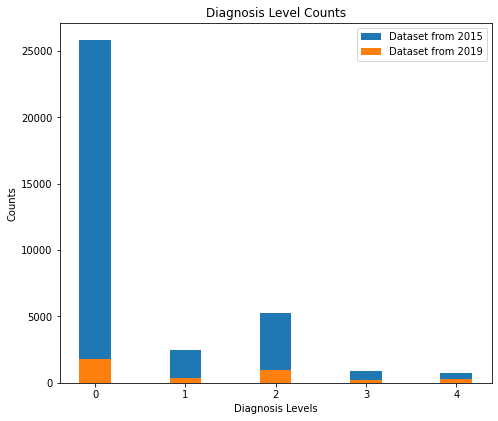

In [11]:
plot_level_counts(df_dataset15, df_dataset19)

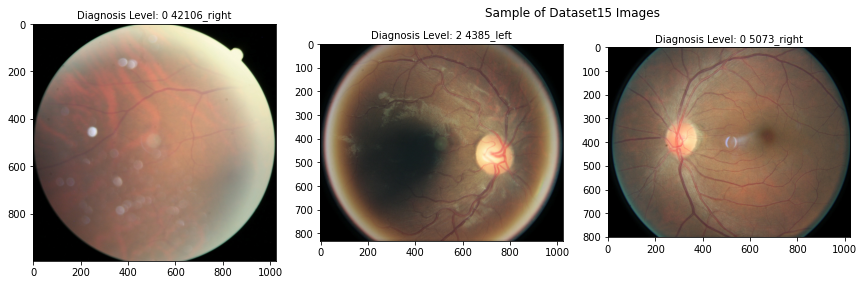

In [14]:
plt = plot_n_images(df_dataset15, dataset15_path_str, 'Sample of Dataset15 Images', 3)
plt.show()

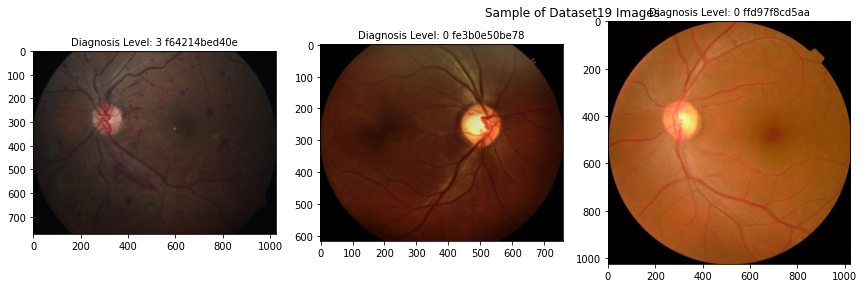

In [15]:
plt = plot_n_images(df_dataset19, dataset19_path_str, 'Sample of Dataset19 Images', 3)
plt.show()

In [16]:
df_dataset15test = create_dataset_df(labels_path_str, labels15test_csv_str, dataset15_column_renames)
df_dataset15test['level'].value_counts()
#0    39533
#2     7861
#1     3762
#3     1214
#4     1206
#ame: level, dtype: int64

0    39533
2     7861
1     3762
3     1214
4     1206
Name: level, dtype: int64

##Preprocessing and Modeling

In [17]:
test13_dataset19_df_all = df_dataset19.copy(deep=True)
df_convert_levels(test13_dataset19_df_all, binary_level_conversions)

In [18]:
test13_data = create_databunch_from_df (dataset19_path_str, test13_dataset19_df_all, largeBatchSize, imagesizeTransform)

In [19]:
#Lengths of full test13 dataset, test13 training data(80%), test13 testing data(20%)
len(test13_dataset19_df_all), len(test13_data.train_ds), len(test13_data.valid_ds)
#(3662, 2930, 732)

(3662, 2930, 732)

In [20]:
print(test13_data.classes)
#[0, 4]

[0, 4]


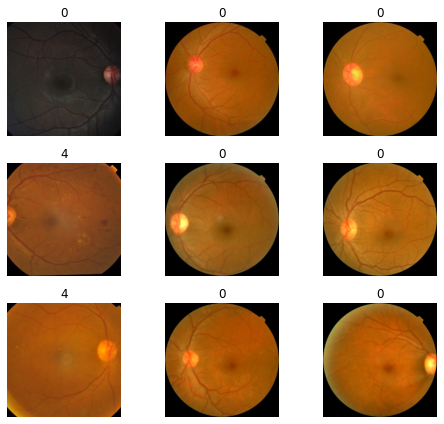

In [21]:
test13_data.show_batch(rows=3, figsize=(7,6))

In [22]:
learn13 = cnn_learner(test13_data, models.resnet50, metrics=[accuracy, Recall()])

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [23]:
# Get information to possibly refine model later
#learn13.lr_find()
#learn13.recorder.plot()

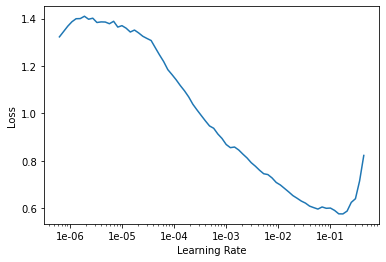

In [24]:
#learn13.fit_one_cycle(10)
#epoch	train_loss	valid_loss	accuracy	recall	time
#0	0.329061	0.131287	0.963115	0.942408	04:29
#1	0.192800	0.116026	0.967213	0.973822	02:01
#2	0.135634	0.155759	0.967213	0.945026	02:01
#3	0.096610	0.091176	0.972678	0.963351	02:01
#4	0.059017	0.106100	0.967213	0.950262	02:05
#5	0.039672	0.110013	0.969945	0.960733	02:06
#6	0.031384	0.109739	0.975410	0.963351	02:06
#7	0.024064	0.088130	0.979508	0.976440	02:06
#8	0.017858	0.097878	0.975410	0.965969	02:08
#9	0.011855	0.096592	0.974044	0.963351	02:07

In [25]:
# Only save once
# Base path used by method - directory names models under directory with images used in this model (gdrive/My Drive/Springboard/Diabetic_Retinopathy/models)
#learn13.save('images13-epoch10')

In [26]:
#learn13.fit_one_cycle(8)
#epoch	train_loss	valid_loss	accuracy	recall	time
#0	0.012451	0.093527	0.975410	0.963351	02:04
#1	0.018860	0.100563	0.974044	0.963351	02:04
#2	0.041211	0.133815	0.967213	0.963351	02:05
#3	0.034610	0.124059	0.976776	0.960733	02:05
#4	0.026190	0.073731	0.984973	0.976440	02:05
#5	0.020663	0.106632	0.982240	0.971204	02:05
#6	0.017519	0.074327	0.980874	0.971204	02:06
#7	0.013122	0.070310	0.982240	0.973822	02:06

In [27]:
# Only save once
# Base path used by method - directory names models under directory with images used in this model (gdrive/My Drive/Springboard/Diabetic_Retinopathy/models)
#learn13.save('images13-epoch8')

In [28]:
# Only save once
# Base path used by method - directory with images used in this model (gdrive/My Drive/Springboard/Diabetic_Retinopathy/)
#learn13_model_file = 'models/diabetic_retinopathy_detector13.'
#learn13.export(learn13_model_file)

In [ ]:
learn13.load('images13-epoch8')

In [30]:
interp13 = ClassificationInterpretation.from_learner(learn13)

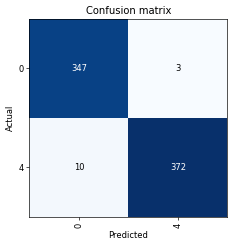

In [31]:
interp13.plot_confusion_matrix(figsize=(4,4), dpi=60)

In [33]:
df_dataset15test_nonzerolevels = df_dataset15test[df_dataset15test['level']>0]

In [34]:
pred_test13_data = predict_test_data(test_image_file_path_str, df_dataset15test_nonzerolevels, n_to_test, learn13)

In [36]:
print(pred_test13_data)
#{'actual': array([   0.,  549., 1115.,  192.,  144.]), 
#'correct_pred': array([  0.,  48., 282.,  76.,  72.]), 
#'recall': array([     nan, 0.087432, 0.252915, 0.395833, 0.5     ])}

{'actual': array([   0.,  549., 1115.,  192.,  144.]), 'correct_pred': array([  0.,  48., 282.,  76.,  72.]), 'recall': array([     nan, 0.087432, 0.252915, 0.395833, 0.5     ])}


In [37]:
# Create dataframes with sample information for each of dataset15 and dataset19
test11_dataset15_level_sample_n = [1500, 300, 300, 700, 700]
test11_dataset19_level_sample_n = [340, 80, 80, 190, 190]
test11_dataset15_df_samples = create_sample_df(labels_path_str, labels15_csv_str, randomState, dataset15_column_renames, test11_dataset15_level_sample_n, binary_level_conversions)
test11_dataset19_df_samples = create_sample_df(labels_path_str, labels19_csv_str, randomState, dataset19_column_renames, test11_dataset19_level_sample_n, binary_level_conversions)

In [38]:
test11_df_samples = test11_dataset15_df_samples.append(test11_dataset19_df_samples)

In [39]:
test11_data = create_databunch_from_df (test11_samples_path_str, test11_df_samples, smallBatchSize, typicalTransform)

In [40]:
learn11 = cnn_learner(test11_data, models.resnet50, metrics=[accuracy, Recall()])

In [41]:
learn11.load('eye-images-11-3')

Learner(data=ImageDataBunch;

Train: LabelList (3504 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,0,0,0,0
Path: gdrive/My Drive/Springboard/Diabetic_Retinopathy/sample_images11;

Valid: LabelList (876 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
4,4,4,0,0
Path: gdrive/My Drive/Springboard/Diabetic_Retinopathy/sample_images11;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(6

In [42]:
pred_test_data2 = predict_test_data(test_image_file_path_str, df_dataset15test_nonzerolevels, n_to_test, learn11)

In [43]:
print(pred_test_data2)
#{'actual': array([   0.,  549., 1115.,  192.,  144.]), 
#'correct_pred': array([  0., 109., 674., 172., 139.]), 
#'recall': array([     nan, 0.198543, 0.604484, 0.895833, 0.965278])}

{'actual': array([   0.,  549., 1115.,  192.,  144.]), 'correct_pred': array([  0., 109., 674., 172., 139.]), 'recall': array([     nan, 0.198543, 0.604484, 0.895833, 0.965278])}
